In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-placement-data-set/Placement_Data_Full_Class.csv


# Index
* **Reading csv File**
* **Cleaning Data**
* **EDA Using Univariate Analysis**
1. * Countplot
2. * Histplot
3. * Kde
4. * Piechart
* **EDA Using Bivariate & Multivariate Analysis**
1. * Scatterplot
2. * Pairplot
3. * Heatmap
4. * Clustermap
5. * Distplot
6. * Barplot
7. * Boxplot
8. * Heatmap of corr
9. * Clustermap of corr
* **Simplify the Data**
* **Train Test Split**
* **Applying Decision Tree Classifier for Prediction**
* **Got 86% Accuracy**

# Reading csv File

In [2]:
df=pd.read_csv("/kaggle/input/college-placement-data-set/Placement_Data_Full_Class.csv")

In [3]:
df.head(10)

,Sno,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,Mkt&Fin,52.21,Not Placed,NaN


# Cleaning Data

In [4]:
df=df.drop(columns=['Sno','salary'])

In [5]:
df.isnull().sum()

Gender            0
10th %            0
SSC Board         0
12th %            0
HSC Board         0
12th Stream       0
Degree %          0
Degree stream     0
Work exp          0
specialisation    0
Mba %             0
status            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# EDA Using Univariate Analysis

In [7]:
df['Gender'].value_counts()

M    139
F     76
Name: Gender, dtype: int64

# Countplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

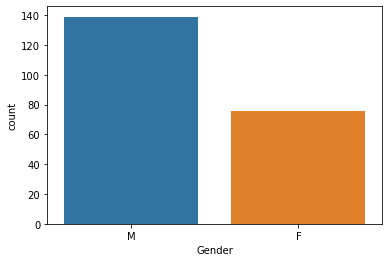

In [8]:
sns.countplot(df['Gender'])

In [9]:
df['SSC Board'].value_counts()

Central    116
Others      99
Name: SSC Board, dtype: int64

# Histplot

<AxesSubplot:xlabel='SSC Board', ylabel='Count'>

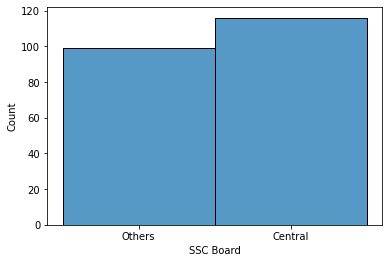

In [10]:
sns.histplot(df['SSC Board'])

In [11]:
df['HSC Board'].value_counts()

Others     131
Central     84
Name: HSC Board, dtype: int64

# Kde

<AxesSubplot:xlabel='HSC Board', ylabel='Count'>

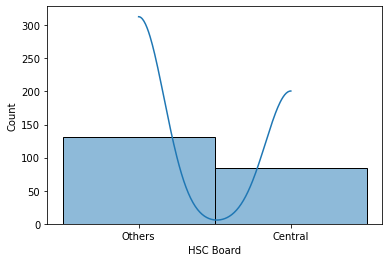

In [12]:
sns.histplot(data=df['HSC Board'],kde=True)

In [13]:
df['12th Stream'].value_counts()

Commerce    113
Science      91
Arts         11
Name: 12th Stream, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='12th Stream', ylabel='count'>

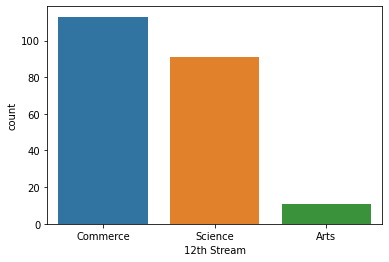

In [14]:
sns.countplot(df['12th Stream'])

In [15]:
df['Degree stream'].value_counts()

Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: Degree stream, dtype: int64

# Piechart

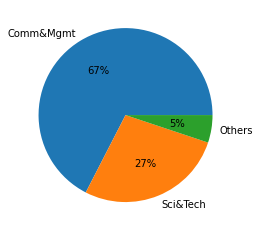

In [16]:
plt.pie(df['Degree stream'].value_counts(),labels=df['Degree stream'].value_counts().index,autopct="%.0f%%")
plt.show()

In [17]:
df['specialisation'].value_counts()

Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='specialisation', ylabel='count'>

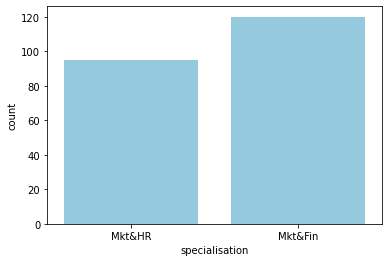

In [18]:
sns.countplot(df['specialisation'],color='skyblue')

# EDA Using Bivariate & Multivariate Analysis

# Scatterplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Degree %', ylabel='Mba %'>

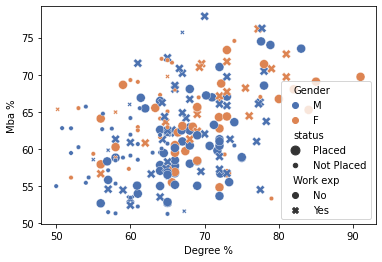

In [19]:
sns.scatterplot(df['Degree %'],df['Mba %'],hue=df['Gender'],style=df['Work exp'],size=df['status'],palette="deep",sizes=(20,80),legend="full")

# Pairplot

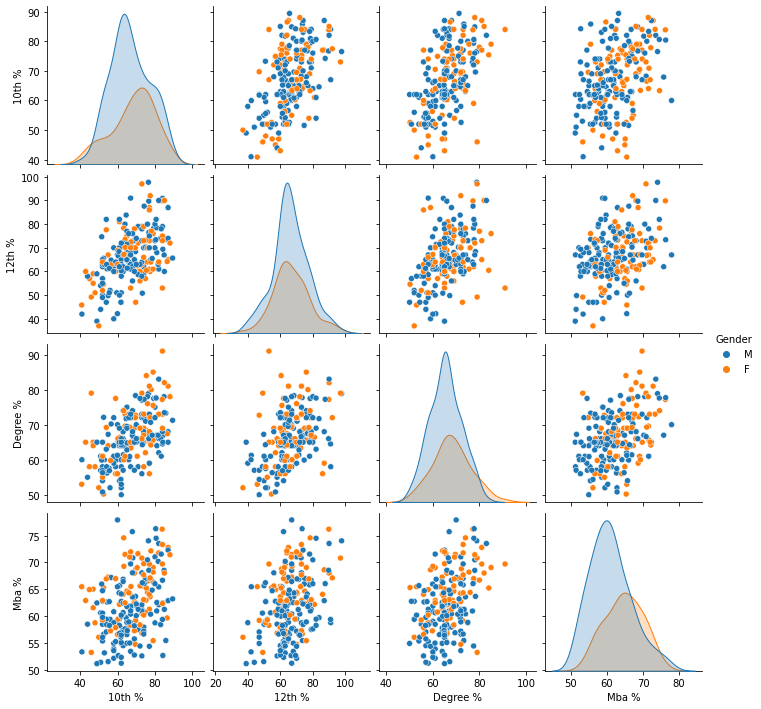

In [20]:
sns.pairplot(df,hue='Gender',corner=False)

# Heatmap

<AxesSubplot:xlabel='status', ylabel='Work exp'>

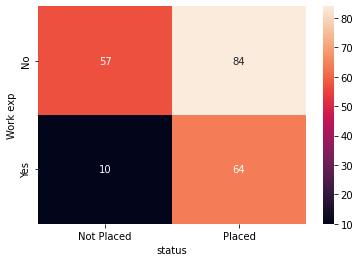

In [21]:
sns.heatmap(pd.crosstab(df['Work exp'],df['status']),annot=True)

# Clustermap

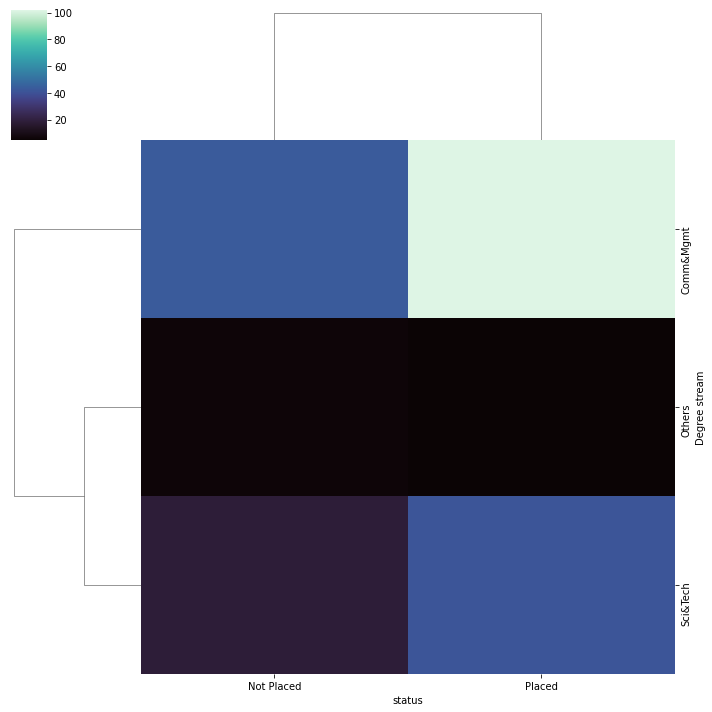

In [22]:
sns.clustermap(pd.crosstab(df['Degree stream'],df['status']),cmap="mako")

# Distplot

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12th %', ylabel='Density'>

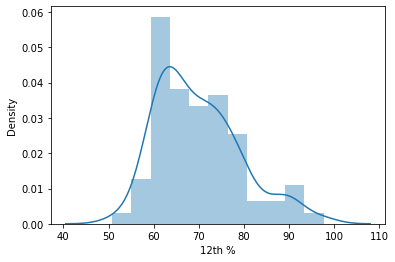

In [23]:
sns.distplot(df[df['status']=="Placed"]['12th %'])

# Barplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='Mba %'>

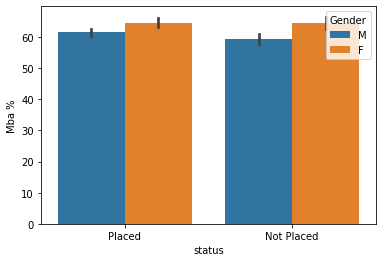

In [24]:
sns.barplot(df['status'],df['Mba %'],hue=df['Gender'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Degree stream', ylabel='Degree %'>

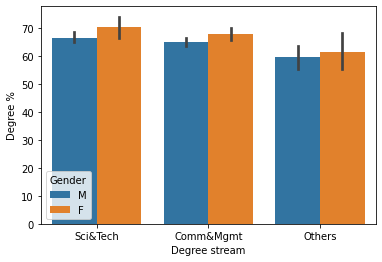

In [25]:
sns.barplot(df['Degree stream'],df['Degree %'],hue=df['Gender'])

# Boxplot

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Degree stream', ylabel='Degree %'>

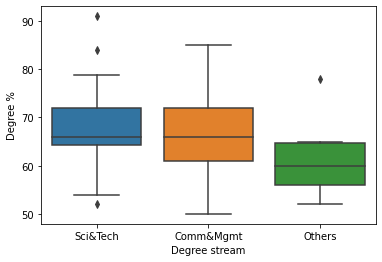

In [26]:
sns.boxplot(df['Degree stream'],df['Degree %'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='status', ylabel='Mba %'>

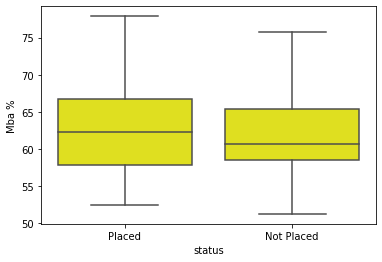

In [27]:
sns.boxplot(df['status'],df['Mba %'],color='yellow')

In [28]:
df.corr()

,10th %,12th %,Degree %,Mba %
10th %,1.000000,0.511472,0.538404,0.388478
12th %,0.511472,1.000000,0.434206,0.354823
Degree %,0.538404,0.434206,1.000000,0.402364
Mba %,0.388478,0.354823,0.402364,1.000000


# Heapmap of corr

<AxesSubplot:>

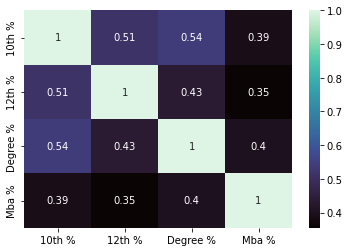

In [29]:
sns.heatmap(df.corr(),annot=True,cmap="mako")

# Clustermap of corr

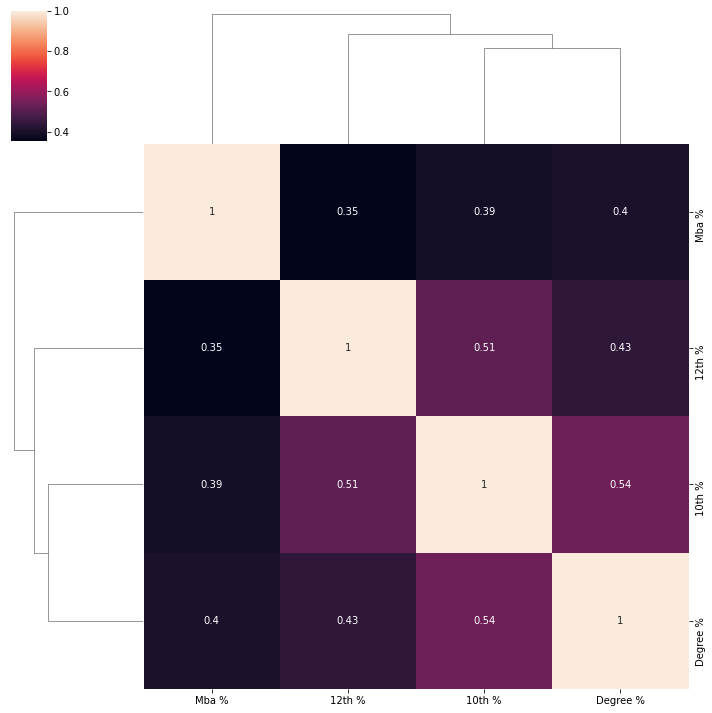

In [30]:
sns.clustermap(df.corr(),annot=True)

# Simplify the Data

In [31]:
for i in range(0,215):
    if df['Gender'][i]=='M':
        df['Gender'][i]=1
    else:
        df['Gender'][i]=0
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
for i in range(0,215):
    if df['SSC Board'][i]=='Central':
        df['SSC Board'][i]=1
    else:
        df['SSC Board'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
for i in range(0,215):
    if df['HSC Board'][i]=='Central':
        df['HSC Board'][i]=1
    else:
        df['HSC Board'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
for i in range(0,215):
    if df['12th Stream'][i]=='Science':
        df['12th Stream'][i]=1
    elif(df['12th Stream'][i]=='Arts'):
        df['12th Stream'][i]=2
    else:
        df['12th Stream'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [35]:
for i in range(0,215):
    if df['Degree stream'][i]=='Comm&Mgmt':
        df['Degree stream'][i]=1
    elif(df['Degree stream'][i]=='Sci&Tech'):
        df['Degree stream'][i]=2
    else:
        df['Degree stream'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [36]:
for i in range(0,215):
    if df['Work exp'][i]=='Yes':
        df['Work exp'][i]=1
    else:
        df['Work exp'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
for i in range(0,215):
    if df['specialisation'][i]=='Mkt&HR':
        df['specialisation'][i]=1
    else:
        df['specialisation'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
for i in range(0,215):
    if df['status'][i]=='Placed':
        df['status'][i]=1
    else:
        df['status'][i]=0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [39]:
df

,Gender,10th %,SSC Board,12th %,HSC Board,12th Stream,Degree %,Degree stream,Work exp,specialisation,Mba %,status
0,1,67.00,0,91.00,0,0,58.00,2,0,1,58.80,1
1,1,79.33,1,78.33,0,1,77.48,2,1,0,66.28,1
2,1,65.00,1,68.00,1,2,64.00,1,0,0,57.80,1
3,1,56.00,1,52.00,1,1,52.00,2,0,1,59.43,0
4,1,85.80,1,73.60,1,0,73.30,1,0,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,0,82.00,0,0,77.60,1,0,0,74.49,1
211,1,58.00,0,60.00,0,1,72.00,2,0,0,53.62,1
212,1,67.00,0,67.00,0,0,73.00,1,1,0,69.72,1
213,0,74.00,0,66.00,0,0,58.00,1,0,1,60.23,1


# Train Test Split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,0:11],df.iloc[:,-1],test_size=0.3,random_state=42)

# Applying Decision Tree Classifier for Prediction

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
clf=DecisionTreeClassifier()
y_train=y_train.astype(int)


In [43]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
clf_pred=clf.predict(x_test)

In [45]:
y_test=y_test.astype(int)

In [46]:
clf_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [47]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
lr_cm= confusion_matrix(y_test, clf_pred)

# Got 86% Accuracy

In [48]:
f1_score(y_test,clf_pred)

0.8817204301075268